# Machine Learning
### Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)

---

### K-Nearest Neighbors (K-NN)

$k$-nearest neighbors ($k$-NN) is a type of instance-based learning, a method of supervised machine learning. It is used for classification and regression tasks.

In $k$-NN, the algorithm is given a labeled training dataset and a set of test data. To make a prediction for a test instance, the algorithm looks at the $k$ nearest neighbors in the training dataset, based on the distance between the test instance and the training instances. The prediction is then made based on the majority class among the $k$ nearest neighbors. For classification tasks, the prediction is the class with the most neighbors. For regression tasks, the prediction is the mean or median of the values of the $k$ nearest neighbors.

**Importing the libraries**

In [1]:
import pandas as pd

**Importing the dataset**

In [2]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

**Splitting the dataset into the Training set and Test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

**Feature Scaling**

$k$-NN is sensitive to the scale of the features, and it may not perform well if the features have very different scales.

In [5]:
from sklearn.preprocessing import StandardScaler

In order to avoid *information leakage*, it is highly important to keep in mind that only the `transform` method has to be applied on the `X_test`. $(\mu,\ \sigma)$ are of `X_train` test.

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the K-NN model on the Training set**

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

**Predicting a new result**

In [10]:
clf.predict(sc.transform([[30,87000]]))

array([0])

**Predicting the Test set results**

In [11]:
y_pred = clf.predict(X_test)

**Displaying the Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [14]:
cm

array([[54,  9],
       [ 4, 33]])

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

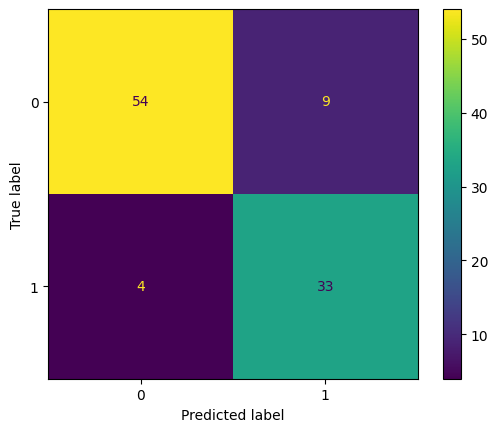

In [16]:
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot();

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}')

Accuracy = 0.87


[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

In [19]:
pd.crosstab(y_test, y_pred, rownames=['Expected'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Expected,,,
0,54,9,63
1,4,33,37
All,58,42,100


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        63
           1       0.79      0.89      0.84        37

    accuracy                           0.87       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.88      0.87      0.87       100



$k$-NN is a simple and effective method for classification and regression tasks, and it is easy to understand and implement. However, it can be computationally expensive to find the $k$ nearest neighbors for each test instance, especially for large datasets.